<a href="https://colab.research.google.com/github/202351084/DeteksiHurufPadaBahasaIsyarat/blob/main/DeteksiHurufPadaBahasaIsyarat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import library
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load dataset
train_df = pd.read_csv('/content/drive/MyDrive/datasetsignlanguage/sign_mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/datasetsignlanguage/sign_mnist_test.csv')

# Preprocessing
X_train = train_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_train = tf.keras.utils.to_categorical(train_df['label'].values)
X_test = test_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_test = tf.keras.utils.to_categorical(test_df['label'].values)

# Split training data untuk validasi
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Membangun model CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=64)

# Evaluasi model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.3095 - loss: 2.3339 - val_accuracy: 0.9082 - val_loss: 0.3717
Epoch 2/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.8636 - loss: 0.4218 - val_accuracy: 0.9818 - val_loss: 0.0940
Epoch 3/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.9469 - loss: 0.1687 - val_accuracy: 0.9934 - val_loss: 0.0368
Epoch 4/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.9757 - loss: 0.0849 - val_accuracy: 0.9996 - val_loss: 0.0095
Epoch 5/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.9805 - loss: 0.0617 - val_accuracy: 1.0000 - val_loss: 0.0063
Epoch 6/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9901 - loss: 0.0379 - val_accuracy: 0.9993 - val_loss: 0.0028
Epoch 7/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9884 - loss: 0.0372 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 8/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.9938 - loss: 0.0217 - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - accuracy: 0.3008 - loss: 2.3515 - val_accuracy: 0.8776 - val_loss: 0.4321
Epoch 2/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.8501 - loss: 0.4702 - val_accuracy: 0.9723 - val_loss: 0.1265
Epoch 3/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.9411 - loss: 0.1919 - val_accuracy: 0.9953 - val_loss: 0.0368
Epoch 4/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.9737 - loss: 0.0921 - val_accuracy: 0.9993 - val_loss: 0.0148
Epoch 5/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9802 - loss: 0.0645 - val_accuracy: 0.9996 - val_loss: 0.0064
Epoch 6/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.9834 - loss: 0.0506 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 7/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.9891 - loss: 0.0379 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 8/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.9917 - loss: 0.0287 - 

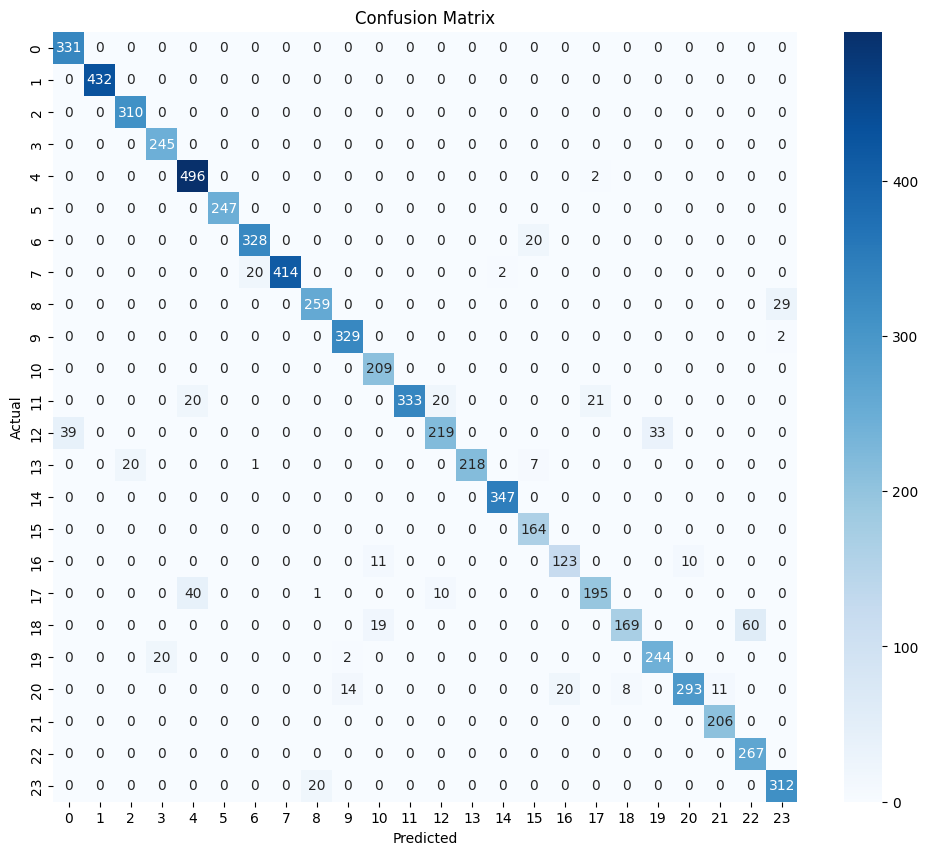

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Import library
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load dataset
train_df = pd.read_csv('/content/drive/MyDrive/datasetsignlanguage/sign_mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/datasetsignlanguage/sign_mnist_test.csv')

# Preprocessing
X_train = train_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_train = tf.keras.utils.to_categorical(train_df['label'].values)
X_test = test_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_test = tf.keras.utils.to_categorical(test_df['label'].values)

# Split training data untuk validasi
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Membangun model CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=64)

# Evaluasi model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 16.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tensorflow>=2.2.0, which is not installed.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, which is not installed.
google-colab 1.0.0 requires pandas==2

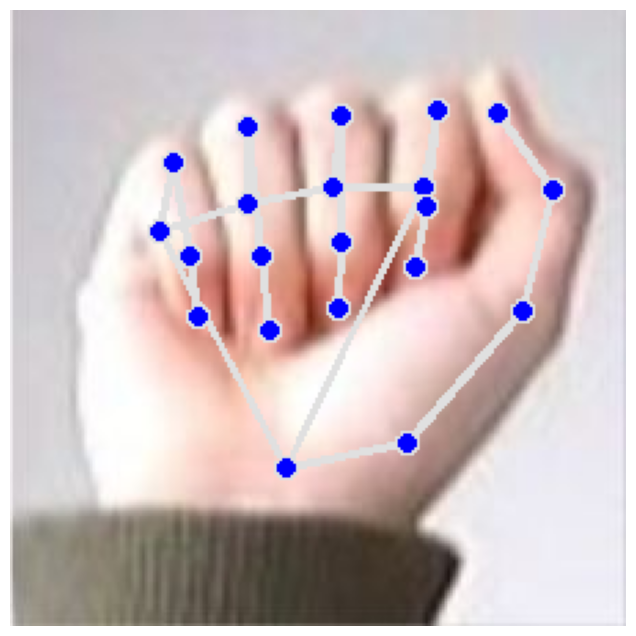

In [ ]:
!pip install mediapipe
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.7)
mp_drawing = mp.solutions.drawing_utils

# Load gambar tangan contoh
image = cv2.imread('/content/drive/MyDrive/datasetsignlanguage/HandSign/A.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = hands.process(image_rgb)

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image_rgb, hand_landmarks, mp_hands.HAND_CONNECTIONS)

plt.figure(figsize=(8,8))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


In [ ]:
# Install libraries
!pip install numpy pandas tensorflow scikit-learn matplotlib pillow


  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (644.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is incompatible.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - accuracy: 0.2777 - loss: 2.4246 - val_accuracy: 0.8718 - val_loss: 0.4843
Epoch 2/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.8288 - loss: 0.5336 - val_accuracy: 0.9680 - val_loss: 0.1343
Epoch 3/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.9232 - loss: 0.2338 - val_accuracy: 0.9945 - val_loss: 0.0393
Epoch 4/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9664 - loss: 0.1171 - val_accuracy: 0.9978 - val_loss: 0.0181
Epoch 5/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9714 - loss: 0.0915 - val_accuracy: 0.9996 - val_loss: 0.0061
Epoch 6/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.9809 - loss: 0.0615 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 7/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9847 - loss: 0.0506 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 8/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.9878 - loss: 0.0423 - 

Test accuracy: 0.9156
Model berhasil disimpan ke Google Drive!


Saving G.jpg to G.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Gambar G.jpg terdeteksi sebagai huruf: G


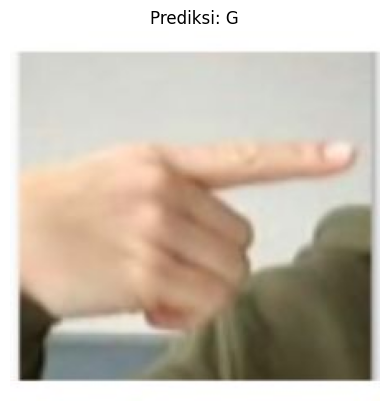

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib import pyplot as plt

# Load dataset CSV dari Drive
train_df = pd.read_csv('/content/drive/MyDrive/datasetsignlanguage/sign_mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/datasetsignlanguage/sign_mnist_test.csv')

# Prepare training data
X_train = train_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_train = tf.keras.utils.to_categorical(train_df['label'].values)
X_test = test_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_test = tf.keras.utils.to_categorical(test_df['label'].values)

# Split validation data dari training
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=64)

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Save model ke Google Drive setelah pelatihan selesai
model.save('/content/drive/MyDrive/datasetsignlanguage/sign_language_model.h5')
print("Model berhasil disimpan ke Google Drive!")

# Fungsi preprocessing gambar upload user
def preprocess_user_image(img_path):
    img = load_img(img_path, color_mode='grayscale', target_size=(28,28))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # shape (1,28,28,1)
    return img_array

# Mapping label ke huruf (A-Z, tanpa J dan Z biasanya di dataset ini)
labels_map = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'K',
    10:'L',11:'M',12:'N',13:'O',14:'P',15:'Q',16:'R',17:'S',18:'T',
    19:'U',20:'V',21:'W',22:'X',23:'Y'
}

# Fungsi prediksi huruf dari gambar input
def predict_sign_language(img_path):
    processed_img = preprocess_user_image(img_path)
    prediction = model.predict(processed_img)
    class_idx = np.argmax(prediction)
    return labels_map.get(class_idx, 'Unknown')

# Contoh upload gambar untuk prediksi (di Colab)
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
    pred = predict_sign_language(filename)
    print(f'Gambar {filename} terdeteksi sebagai huruf: {pred}')
    # Tampilkan gambar
    img = load_img(filename)
    plt.imshow(img)
    plt.title(f'Prediksi: {pred}')
    plt.axis('off')
    plt.show()


In [ ]:
model.fit(datagen.flow(X_train, y_train, batch_size=64), validation_data=(X_val, y_val), epochs=15)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


387/387 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.1940 - loss: 3.0915 - val_accuracy: 0.8248 - val_loss: 0.7410
Epoch 2/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.4199 - loss: 1.8003 - val_accuracy: 0.8853 - val_loss: 0.5079
Epoch 3/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 31s 75ms/step - accuracy: 0.4979 - loss: 1.5330 - val_accuracy: 0.8897 - val_loss: 0.4151
Epoch 4/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.5469 - loss: 1.3703 - val_accuracy: 0.9071 - val_loss: 0.3598
Epoch 5/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.5954 - loss: 1.2177 - val_accuracy: 0.9097 - val_loss: 0.2982
Epoch 6/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.6232 - loss: 1.1280 - val_accuracy: 0.8940 - val_loss: 0.3211
Epoch 7/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - accuracy: 0.6496 - loss: 1.0526 - val_accuracy: 0.9199 - val_loss: 0.2629
Epoch 8/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.6639 - loss: 0.9860 - val_accura

In [ ]:
!pip install tensorflow


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf # Ensure tensorflow is imported

# Define the new input shape for VGG16
new_input_shape = (32, 32, 3) # Resizing to 32x32 pixels, with 3 channels for RGB

# Load pre-trained VGG16 model, excluding the top (fully connected layers)
# Update the input_shape here
base_model = VGG16(weights='imagenet', include_top=False, input_shape=new_input_shape)

# Freeze all layers of the base model (to avoid training them)
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the pre-trained model
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
# Assuming labels_map is defined and has the correct number of classes
# You might need to re-run the cell where labels_map is defined if you restart the notebook
# Define labels_map if it's not already in the current scope
labels_map = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'K',
    10:'L',11:'M',12:'N',13:'O',14:'P',15:'Q',16:'R',17:'S',18:'T',
    19:'U',20:'V',21:'W',22:'X',23:'Y'
}
# Change the number of units in the last Dense layer to 25
x = Dense(25, activation='softmax')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# --- Update Data Preparation ---
# Need to ensure X_train, X_val, X_test are also resized and have 3 channels.
# Original data is grayscale (1 channel), VGG16 expects RGB (3 channels).

# Assuming X_train, X_val, X_test are already loaded and normalized with shape (-1, 28, 28, 1)

# Resize images and change channel to 3 for VGG16 input using TensorFlow operations
def resize_and_repeat_channels(images, target_size):
    # Ensure the input images are already float32 for TensorFlow operations
    images = tf.cast(images, tf.float32)
    # Resize the images to the target size (e.g., 32x32)
    resized_images = tf.image.resize(images, target_size[:2])
    # Convert the grayscale images (1 channel) to RGB (3 channels) by repeating the channel
    rgb_images = tf.image.grayscale_to_rgb(resized_images)
    return rgb_images.numpy() # Convert back to numpy array if needed for datagen.fit

# Resize and prepare data for VGG16 input
X_train_vgg = resize_and_repeat_channels(X_train, new_input_shape)
X_val_vgg = resize_and_repeat_channels(X_val, new_input_shape)
X_test_vgg = resize_and_repeat_channels(X_test, new_input_shape)


# Setup augmentasi data with the new input shape
datagen = ImageDataGenerator(
    rotation_range=20,             # Rotasi gambar dalam rentang 20 derajat
    width_shift_range=0.2,         # Geser gambar secara horizontal
    height_shift_range=0.2,        # Geser gambar secara vertikal
    shear_range=0.2,               # Geser gambar secara acak
    zoom_range=0.2,                # Zoom gambar secara acak
    horizontal_flip=True,          # Flip gambar secara horizontal
    fill_mode='nearest'            # Isi area kosong dengan piksel terdekat
)

# Fit the datagen on the resized training data
datagen.fit(X_train_vgg)

# Train the model with data augmentation using the resized data
model.fit(datagen.flow(X_train_vgg, y_train, batch_size=64), validation_data=(X_val_vgg, y_val), epochs=15)

# Evaluate model using the resized test data
test_loss, test_acc = model.evaluate(X_test_vgg, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# --- Update Preprocessing for User Uploaded Images ---
# The preprocess_user_image function also needs to resize and handle channels correctly

def preprocess_user_image(img_path, target_size=(32, 32)):
    img = load_img(img_path, color_mode='grayscale', target_size=target_size) # Load and resize
    img_array = img_to_array(img) / 255.0  # Normalisasi
    # Convert to tensor and add batch dimension
    img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)
    img_tensor = tf.expand_dims(img_tensor, axis=0)
    # Repeat the grayscale channel 3 times for VGG16 input
    img_rgb = tf.image.grayscale_to_rgb(img_tensor)
    return img_rgb.numpy() # Convert back to numpy array

# Note: You will also need to ensure the `uploaded` variable is available if you run the example prediction code block.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 369s 951ms/step - accuracy: 0.2038 - loss: 2.7190 - val_accuracy: 0.6708 - val_loss: 1.3226
Epoch 2/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 326s 842ms/step - accuracy: 0.4199 - loss: 1.8131 - val_accuracy: 0.7418 - val_loss: 1.0010
Epoch 3/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 321s 829ms/step - accuracy: 0.4988 - loss: 1.5514 - val_accuracy: 0.7848 - val_loss: 0.8304
Epoch 4/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 321s 825ms/step - accuracy: 0.5366 - loss: 1.4243 - val_accuracy: 0.8117 - val_loss: 0.7191
Epoch 5/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 319s 826ms/step - accuracy: 0.5656 - loss: 1.3287 - val_accuracy: 0.8274 - val_loss: 0.6660
Epoch 6/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 312s 807ms/step - accuracy: 0.5832 - loss: 1.2570 - val_accuracy: 0.8274 - val_loss: 0.6143
Epoch 7/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 322s 832ms/step - accuracy: 0.5982 - loss: 1.1989 - val_accuracy: 0.8565 - val_loss: 0.5755
Epoch 8/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 322s 833ms/step - accuracy: 0.6059 -

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Fungsi preprocessing gambar upload user
def preprocess_user_image(img_path):
    img = load_img(img_path, color_mode='grayscale', target_size=(28,28))  # Memastikan ukuran gambar 28x28
    img_array = img_to_array(img) / 255.0  # Normalisasi gambar
    img_array = np.expand_dims(img_array, axis=0)  # Shape (1, 28, 28, 1)
    return img_array

# Fungsi prediksi huruf dari gambar input
def predict_sign_language(img_path):
    processed_img = preprocess_user_image(img_path)
    prediction = model.predict(processed_img)
    class_idx = np.argmax(prediction)
    return labels_map.get(class_idx, 'Unknown')


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9060 - loss: 0.4310
Test accuracy: 0.9078


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.2876 - loss: 2.3924 - val_accuracy: 0.8718 - val_loss: 0.4548
Epoch 2/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.8473 - loss: 0.4691 - val_accuracy: 0.9843 - val_loss: 0.1098
Epoch 3/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9413 - loss: 0.1906 - val_accuracy: 0.9989 - val_loss: 0.0232
Epoch 4/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.9732 - loss: 0.0939 - val_accuracy: 1.0000 - val_loss: 0.0088
Epoch 5/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.9840 - loss: 0.0577 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 6/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9875 - loss: 0.0440 - val_accuracy: 0.9996 - val_loss: 0.0028
Epoch 7/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.9899 - loss: 0.0320 - val_accuracy: 0.9996 - val_loss: 0.0017
Epoch 8/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9930 - loss: 0.0243 - 

Test accuracy: 0.9340
Model berhasil disimpan ke Google Drive!


Saving B.jpg to B (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Gambar B (1).jpg terdeteksi sebagai huruf: B


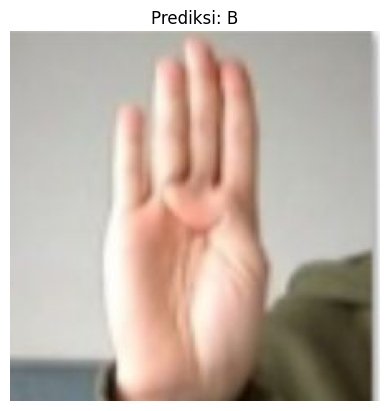

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Import train_test_split after ensuring sklearn is installed correctly
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib import pyplot as plt
# Import scipy to ensure it's available and correctly linked, though not directly used here
import scipy

# Install necessary libraries if not already installed.
# Consolidate installation and remove the problematic uninstall step.
# Ensure scipy is included and updated along with other libraries.
# Using a single upgrade command for all major libraries should resolve dependency issues.
!pip install --upgrade tensorflow numpy pandas scikit-learn matplotlib pillow scipy

# Load dataset CSV dari Drive
train_df = pd.read_csv('/content/drive/MyDrive/datasetsignlanguage/sign_mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/datasetsignlanguage/sign_mnist_test.csv')

# Prepare training data
X_train = train_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_train = tf.keras.utils.to_categorical(train_df['label'].values)
X_test = test_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_test = tf.keras.utils.to_categorical(test_df['label'].values)

# Split validation data dari training
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=64)

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Save model ke Google Drive setelah pelatihan selesai
model.save('/content/drive/MyDrive/datasetsignlanguage/sign_language_model.h5')
print("Model berhasil disimpan ke Google Drive!")

# Fungsi preprocessing gambar upload user
def preprocess_user_image(img_path):
    img = load_img(img_path, color_mode='grayscale', target_size=(28,28))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # shape (1,28,28,1)
    return img_array

# Mapping label ke huruf (A-Z, tanpa J dan Z biasanya di dataset ini)
labels_map = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'K',
    10:'L',11:'M',12:'N',13:'O',14:'P',15:'Q',16:'R',17:'S',18:'T',
    19:'U',20:'V',21:'W',22:'X',23:'Y'
}

# Fungsi prediksi huruf dari gambar input
def predict_sign_language(img_path):
    processed_img = preprocess_user_image(img_path)
    prediction = model.predict(processed_img)
    class_idx = np.argmax(prediction)
    return labels_map.get(class_idx, 'Unknown')

# Contoh upload gambar untuk prediksi (di Colab)
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
    pred = predict_sign_language(filename)
    print(f'Gambar {filename} terdeteksi sebagai huruf: {pred}')
    # Tampilkan gambar
    img = load_img(filename)
    plt.imshow(img)
    plt.title(f'Prediksi: {pred}')
    plt.axis('off')
    plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 24s 62ms/step - accuracy: 0.3280 - loss: 2.3196 - val_accuracy: 0.8618 - val_loss: 0.4737
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 27s 79ms/step - accuracy: 0.8858 - loss: 0.3667 - val_accuracy: 0.9601 - val_loss: 0.1545
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.9841 - loss: 0.0946 - val_accuracy: 0.9827 - val_loss: 0.0611
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 23s 66ms/step - accuracy: 0.9916 - loss: 0.0458 - val_accuracy: 0.9985 - val_loss: 0.0210
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 48s 85ms/step - accuracy: 0.9988 - loss: 0.0152 - val_accuracy: 0.9996 - val_loss: 0.0078
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 33s 62ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 0.9995 - val_loss: 0.0041
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 42s 64ms/step - accuracy: 0.9999 - loss: 0.0031 - val_accuracy: 0.9982 - val_loss: 0.0086
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9990 - loss: 0.0078 - 

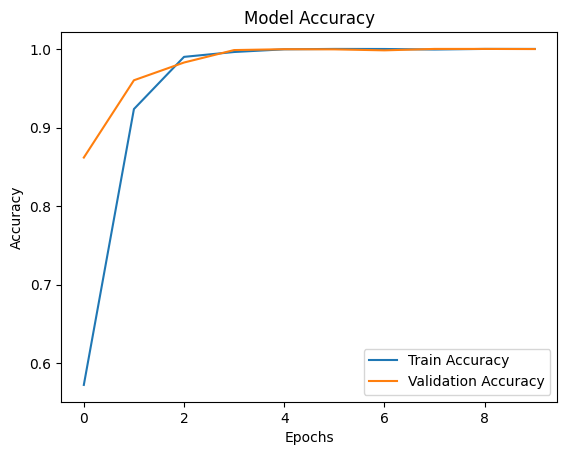

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9095 - loss: 0.3947
Test Accuracy: 0.9139710068702698


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# Memuat dataset
train_data = pd.read_csv('/content/drive/MyDrive/datasetsignlanguage/sign_mnist_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/datasetsignlanguage/sign_mnist_test.csv')

# Memisahkan fitur dan label
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Mengubah data ke bentuk gambar 28x28 pixel dan normalisasi
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Mengubah label menjadi one-hot encoding
y_train = to_categorical(y_train, 26)
y_test = to_categorical(y_test, 26)

# Membagi data untuk validasi
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Membangun model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')  # 26 kelas (A-Z)
])

# Kompilasi model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

# Menyimpan model ke Google Drive
model.save('/content/drive/MyDrive/datasetsignlanguage/sign_language_model.h5')

# Plotting grafik akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluasi model pada test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np

# Mengimpor dataset (asumsi dataset Anda adalah sign_mnist_train.csv dan sign_mnist_test.csv)
train_data = pd.read_csv('/content/drive/MyDrive/datasetsignlanguage/sign_mnist_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/datasetsignlanguage/sign_mnist_test.csv')

# Memisahkan fitur dan label
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Mengubah data ke bentuk gambar 28x28 pixel dan normalisasi
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Mengubah label menjadi one-hot encoding
y_train = to_categorical(y_train, 26)
y_test = to_categorical(y_test, 26)

# Augmentasi Data untuk meningkatkan keakuratan
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Membangun model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')  # 26 kelas (A-Z)
])

# Kompilasi model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model dengan augmentasi data
model.fit(datagen.flow(X_train, y_train, batch_size=64),
          validation_data=(X_test, y_test),
          epochs=10)

# Menyimpan model
model.save('/content/drive/MyDrive/datasetsignlanguage/sign_language_model_augmented.h5')

# Evaluasi model pada data uji
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


429/429 ━━━━━━━━━━━━━━━━━━━━ 39s 88ms/step - accuracy: 0.0858 - loss: 3.0809 - val_accuracy: 0.3728 - val_loss: 2.0131
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.3221 - loss: 2.1648 - val_accuracy: 0.4796 - val_loss: 1.5023
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 36s 84ms/step - accuracy: 0.4345 - loss: 1.7652 - val_accuracy: 0.5555 - val_loss: 1.2939
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 40s 93ms/step - accuracy: 0.5141 - loss: 1.5148 - val_accuracy: 0.6624 - val_loss: 0.9663
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 35s 83ms/step - accuracy: 0.5713 - loss: 1.3517 - val_accuracy: 0.7386 - val_loss: 0.7730
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 37s 87ms/step - accuracy: 0.6005 - loss: 1.2363 - val_accuracy: 0.7097 - val_loss: 0.8315
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 45s 97ms/step - accuracy: 0.6314 - loss: 1.1462 - val_accuracy: 0.8047 - val_loss: 0.6085
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 36s 84ms/step - accuracy: 0.6718 - loss: 1.0256 - val_accurac

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8238 - loss: 0.5255
Test Accuracy: 0.8194366693496704


**AKURASI DETEKSI GAMBAR KE HURUF DENGAN AKURAT**

Saving M.jpg to M.jpg
File uploaded: M.jpg
File gambar valid!


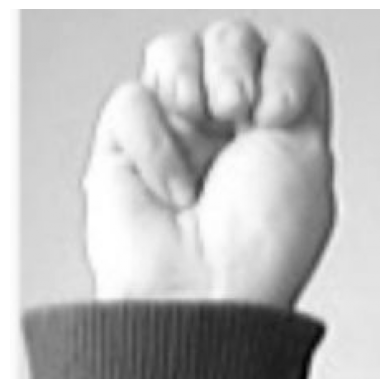

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
Prediksi huruf: M
Gambar ini menunjukkan huruf M


In [ ]:
from google.colab import files
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image

# Memuat model yang sudah dilatih dengan augmentasi data
model = load_model('/content/drive/MyDrive/datasetsignlanguage/sign_language_model_augmented.h5')

# Fungsi untuk meng-upload file gambar
def upload_image():
    uploaded = files.upload()  # Menggunakan fungsi upload dari colab

    # Memeriksa file yang diupload
    for filename in uploaded.keys():
        print(f"File uploaded: {filename}")

        # Mengecek ekstensi file
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            print("File gambar valid!")
            return filename
        else:
            print("File bukan gambar, silakan coba lagi.")
            return None

# Fungsi untuk memproses gambar dan memprediksi huruf
def predict_image(filename):
    img = Image.open(filename).convert('L')  # Mengonversi gambar ke mode grayscale (1 channel)

    # Memastikan gambar diubah ukurannya menjadi 28x28
    img = img.resize((28, 28))

    # Mengubah gambar menjadi array dan normalisasi
    img = np.array(img) / 255.0  # Normalisasi gambar
    img = img.reshape(1, 28, 28, 1)  # Menambahkan dimensi batch dan channel grayscale (1)

    # Prediksi gambar dengan model
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)[0]  # Mendapatkan kelas yang diprediksi

    # Membuat dictionary untuk mapping angka ke huruf
    label_dict = {
        0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
        10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
        20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'
    }

    predicted_label = label_dict.get(predicted_class, 'Unknown')
    print(f"Prediksi huruf: {predicted_label}")

    return predicted_label

# Memanggil fungsi upload
file_name = upload_image()

# Jika file valid, tampilkan gambar dan prediksi huruf
if file_name:
    # Menampilkan gambar
    img = Image.open(file_name).convert('L')  # Convert to grayscale for display
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

    # Memanggil fungsi untuk memprediksi huruf dari gambar
    predicted_label = predict_image(file_name)
    print(f"Gambar ini menunjukkan huruf {predicted_label}")


In [9]:
import gradio as gr
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# Load model
model = load_model('/content/drive/MyDrive/datasetsignlanguage/sign_language_model_augmented.h5')

# Mapping label angka ke huruf
label_dict = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
    20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'
}

# Fungsi prediksi
def classify_image(image):
    try:
        image = image.convert('L')  # Konversi ke grayscale
        image = image.resize((28, 28))
        img_array = np.array(image) / 255.0
        img_array = img_array.reshape(1, 28, 28, 1)

        prediction = model.predict(img_array)
        confidence = np.max(prediction)  # Ambil nilai confidence tertinggi
        predicted_class = np.argmax(prediction, axis=1)[0]

        if confidence < 0.75:  # Threshold bisa kamu sesuaikan (misalnya 0.70–0.85)
            return "❌ Gambar tidak dikenali sebagai huruf isyarat. Harap upload gambar yang sesuai."
        else:
            return f"✅ Huruf yang terdeteksi: {label_dict.get(predicted_class, 'Tidak Dikenal')} (Kepercayaan: {confidence:.2f})"

    except Exception as e:
        return f"⚠️ Terjadi kesalahan saat memproses gambar: {str(e)}"


# Antarmuka Gradio
interface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil", label="🖼️ Upload Gambar Huruf Isyarat"),
    outputs=gr.Textbox(label="📄 Hasil Prediksi"),
    title="🔤 Deteksi Huruf Bahasa Isyarat Tangan",
    description=(
        "Silakan unggah gambar huruf bahasa isyarat tangan. "
        "Sistem akan mendeteksi huruf berdasarkan model deep learning yang sudah dilatih."
    ),
    theme="huggingface"  # atau coba "seafoam", "soft", "default"
)

interface.launch(share=True)


/usr/local/lib/python3.11/dist-packages/gradio/blocks.py:1153: UserWarning: Cannot load huggingface. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/huggingface (Request ID: Root=1-684cea2a-092cde645e60c40c48a84c7b;12c4c4a4-9721-4ac8-b9e7-99384270e360)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7ceb6b616fe2d995ed.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
